# VGG 19

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 #Use the GPU memory 50%
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model 
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

#train_path = 'Datasets/train'
#valid_path = 'Datasets/test'

train_path='C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train'
valid_path='C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
#Preprocessing  - reuse with some modifications
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#Here i am going to take the weights, what ever weights they had stored during training iam going to retreive those weights 
#If we failed to provide the weights('Imagenet') then it starts the training from Scratch.
#include_top = False -->  Default 1000 outputs but in our case only 2 outputs, It skips the flatten and output layer and we can add our own flatten layer and output layer
#include_top=True(which means - whole architecture - input,flatten,output from the VGG16 for Imagenet classification)


In [5]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# don't train existing weights
# Dont train the weights from scratch or dont update the weight and my weights are fixed.
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
#folders = glob('Datasets/train/*')
folders = glob('C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train\*')

In [8]:
folders

['C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train\\cats',
 'C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train\\dogs']

In [9]:
# Flatten Layer
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [10]:
#Output Layer
prediction = Dense(len(folders), activation='softmax')(x) # x - appending my flatten layer(x) with dense layer

# create a model object  by combining the entire input's and output's to create the dense neural network
#Here vgg16 is the model or variable that we have created early
model = Model(inputs=vgg19.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [12]:
#Binary classification(softmax) - so we have used binary_crossentropy as a loss function
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8005 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2023 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
251/251 [==============================] - 357s 1s/step - loss: 0.3962 - accuracy: 0.8394 - val_loss: 0.2414 - val_accuracy: 0.8977
Epoch 2/10
251/251 [==============================] - 138s 551ms/step - loss: 0.2362 - accuracy: 0.9013 - val_loss: 0.2341 - val_accuracy: 0.9076
Epoch 3/10
251/251 [==============================] - 142s 567ms/step - loss: 0.2219 - accuracy: 0.9119 - val_loss: 0.2682 - val_accuracy: 0.9031
Epoch 4/10
251/251 [==============================] - 144s 572ms/step - loss: 0.2022 - accuracy: 0.9158 - val_loss: 0.3219 - val_accuracy: 0.8804
Epoch 5/10
251/251 [==============================] - 146s 583ms/step - loss: 0.1906 - accuracy: 0.9264 - val_loss: 0.2509 - val_accuracy: 0.9081
Epoch 6/10
251/251 [==============================] - 150s 596ms/step - loss: 0.2065 - accuracy: 0.9159 - val_loss: 0.4008 - val_accuracy: 0.8819
Epoch 7/10
251/251 [==============================]

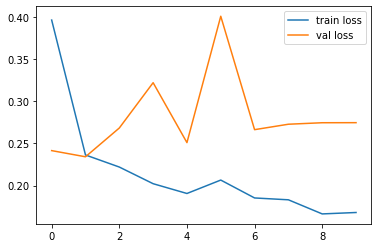

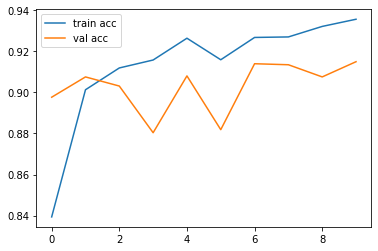

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg19_CatDog.h5')

In [27]:
#Prediction
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_vgg19_CatDog.h5')

In [28]:
test_image = image.load_img('C:\\Users\\Asus-2020\Downloads\\Cat and Dog\\test\\cats\\cat.4038.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
#covert the array values in to noramalize values
test_image=test_image/255
#Exapnd the dimensions
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image) 

In [29]:
result

array([[0.9395714 , 0.06042857]], dtype=float32)

In [31]:
import numpy as np
from keras.preprocessing import image
#test_image = image.load_img('C:\\Users\\Asus-2020\Downloads\\Cat and Dog\\test\\cats\\cat.4038.jpg', target_size = (224, 224))
test_image = image.load_img('C:\\Users\\Asus-2020\Downloads\\Cat and Dog\\test\\dogs\\dog.4040.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
a=np.argmax(model.predict(test_image), axis=1)
if a==0:
    print("Cat")
else:
    print("Dog")


Dog
